<a href="https://colab.research.google.com/github/HenryThrop/IE_CDT_ClimateDynamicsTutorial/blob/main/PredictTimeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate dynamics
## Predicting the weather: timeseries approach
In this part of the climate dynamics tutorial, we will try to predict the temperature in Oxford on 11th November 2026. Here we will use timeseries data from a historical simulation of a climate model.

In [1]:
# First clone the repository to get the data. This may take around a minute since the other notebook involves a large file
!git clone https://github.com/peterukk/IE_CDT_ClimateDynamicsTutorial

Cloning into 'IE_CDT_ClimateDynamicsTutorial'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 67 (delta 25), reused 9 (delta 2), pack-reused 13 (from 1)
Receiving objects: 100% (67/67), 95.31 MiB | 23.69 MiB/s, done.
Resolving deltas: 100% (26/26), done.
Updating files: 100% (12/12), done.


Import all the requirements we need. We will be using `xarray` to open datasets again.

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
#import nc_time_axis
#from IPython.display import display, Latex

As we are using timeseries data, we will select daily time resolution. Since the task requires us to use CMIP6 data, we will use the historical experiment - this means it is the CMIP6 historical simulation, so it is may not be exactly in line with observations.

In [3]:
data_path = "IE_CDT_ClimateDynamicsTutorial/data/"
filename = data_path + "t_CMIP6_historical_HadGEM3-GC31-LL_mon_195001-201412_UK.nc"

In [4]:
ds = xr.open_dataset(filename)
ds

<xarray.Dataset> Size: 22kB
Dimensions:          (bnds: 2, time: 780)
Coordinates:
  * time             (time) datetime64[ns] 6kB 1950-01-01 ... 2014-12-01
    lat              float64 8B ...
    lon              float64 8B ...
    member_id        <U29 116B ...
    gcm_institution  <U4 16B ...
    gcm_model        <U15 60B ...
    gcm_variant      <U8 32B ...
    height2m         float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    lat_bnds         (bnds) float64 16B ...
    lon_bnds         (bnds) float64 16B ...
    time_bnds        (time, bnds) datetime64[ns] 12kB ...
    t                (time) float32 3kB ...
    crs              int32 4B ...
Attributes: (12/28)
    Conventions:                CF-1.9 ACDD-1.3
    title:                      IPCC-WGI AR6 Interactive Atlas Dataset
    summary:                    IPCC-WGI AR6 Interactive Atlas dataset: Month...
    keywords:                   CMIP5, CMIP6, CORDEX, IPCC, Interactive Atlas
    institution:                Instituto de Fisica de Cantabria (IFCA, CSIC-...
    contact:                    ipcc-ddc@ifca.unican.es
    ...                         ...
    geospatial_lon_min:         -180.0
    geospatial_lon_max:         180.0
    geospatial_lon_resolution:  1.0
    geospatial_lon_units:       degrees_east
    date_created:               2022-10-26T00:00:00+00:00
    tracking_id:                4a14519f-05eb-4a2b-8e69-d5f1f8e500de

Select the variables and timeseries that is of interest for us. We want to get the air temperature variable `t`.

In [5]:
surface_temp = ds["t"]
time = ds["time"]
surface_temp

<xarray.DataArray 't' (time: 780)> Size: 3kB
[780 values with dtype=float32]
Coordinates:
  * time             (time) datetime64[ns] 6kB 1950-01-01 ... 2014-12-01
    lat              float64 8B ...
    lon              float64 8B ...
    member_id        <U29 116B ...
    gcm_institution  <U4 16B ...
    gcm_model        <U15 60B ...
    gcm_variant      <U8 32B ...
    height2m         float64 8B ...
Attributes:
    least_significant_digit:  3
    standard_name:            air_temperature
    units:                    degC
    cell_methods:             time: mean within days time: mean over days are...
    long_name:                Monthly mean of daily mean temperature
    comment:                  Monthly mean of daily mean near-surface (usuall...
    grid_mapping:             crs

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2144175703.py:5: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel("Air temperature ($\degree$C)")


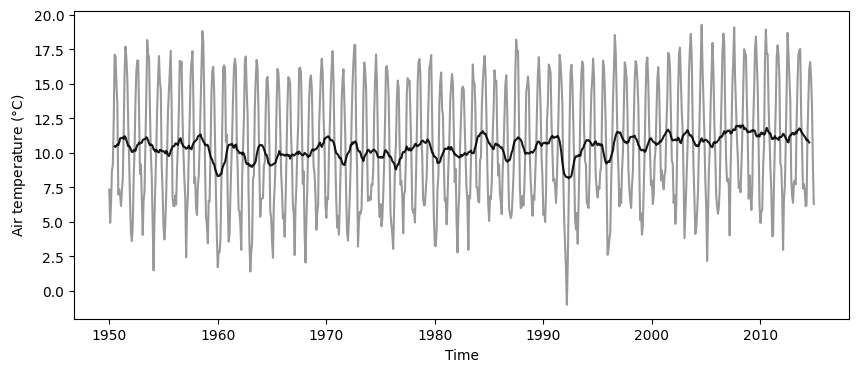

In [6]:
# Plot air temperature with time
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plt.plot(time, surface_temp,
         color="gray", alpha=0.8)
plt.ylabel("Air temperature ($\degree$C)")
plt.xlabel("Time")

# Add rolling averages to this plot
# Annual rolling averages
rolling_surface_temp_12 = surface_temp.rolling(time=12, center=True).mean()
plt.plot(rolling_surface_temp_12.time, rolling_surface_temp_12,
         color="black", alpha=0.9)


## Climatology
In general, the "climatology" prediction is defined based on the temperature for a given location on a given date from the entire history. We generally assume we need at least 30 years of data. For a baseline solution, you could simply consider the mean and standard deviation of the November climatology in the data.


In [35]:
#ds.lon.values

import pandas as pd

# Convert to pandas datetime
time = pd.to_datetime(time)

# Filter only 11th November
mask = (time.month == 11) & (time.day == 1)

Time_nov1 = time[mask]
surface_temp_nov1 = surface_temp[mask]

n = len(Time_nov1)
half = n // 2  # integer division for midpoint

# Split
Time_first_half = Time_nov1[:half]
Time_second_half = Time_nov1[half:]

surface_temp_first_half = surface_temp_nov1[:half]
surface_temp_second_half = surface_temp_nov1[half:]

#Mean and Standard Deviation
mean_total = np.mean(surface_temp_nov1)
std_total  = np.std(surface_temp_nov1)

mean_first = np.mean(surface_temp_first_half)
std_first  = np.std(surface_temp_first_half)

mean_second = np.mean(surface_temp_second_half)
std_second  = np.std(surface_temp_second_half)

print("Total:")
print(f"Mean = {mean_total:.3f}, Std = {std_total:.3f}")

#print("First half:")
#print(f"Mean = {mean_first:.3f}, Std = {std_first:.3f}")

#print("\nSecond half:")
#print(f"Mean = {mean_second:.3f}, Std = {std_second:.3f}")

Total:
Mean = 8.910, Std = 1.347


## Advanced: consider changing climate.
How would you account for changing climate?

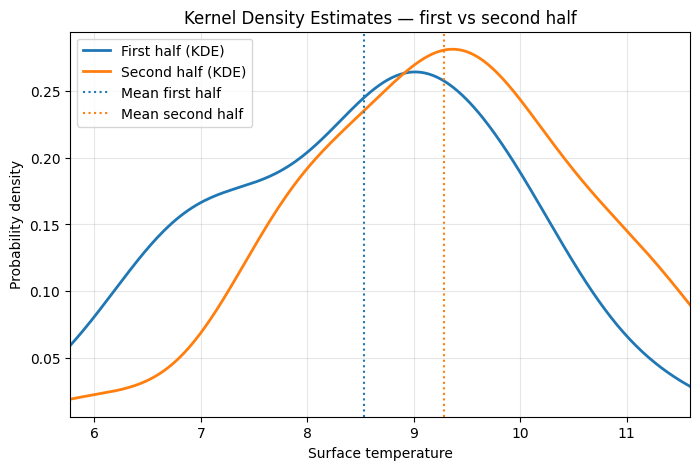

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# ---------- KDE (smooth) ----------
x_grid = np.linspace(xmin, xmax, 300)

plt.figure(figsize=(8,5))
kde_plotted = False

if a1.size > 1:
    kde1 = gaussian_kde(a1)
    plt.plot(x_grid, kde1(x_grid), lw=2, label='First half (KDE)')
    kde_plotted = True
elif a1.size == 1:
    # single point — plot as a spike
    plt.axvline(a1[0], linestyle='--', label='First half (single value)')

if a2.size > 1:
    kde2 = gaussian_kde(a2)
    plt.plot(x_grid, kde2(x_grid), lw=2, label='Second half (KDE)')
    kde_plotted = True
elif a2.size == 1:
    plt.axvline(a2[0], linestyle='--', label='Second half (single value)')

if not kde_plotted and (a1.size + a2.size) <= 2:
    # not enough data for KDEs
    plt.title('KDE not plotted (not enough data). Showing vertical lines for single values.')
else:
    plt.title('Kernel Density Estimates — first vs second half')

# add mean lines
if a1.size > 0:
    plt.axvline(a1.mean(), color='C0', linestyle=':', label='Mean first half')
if a2.size > 0:
    plt.axvline(a2.mean(), color='C1', linestyle=':', label='Mean second half')

plt.xlabel('Surface temperature')
plt.ylabel('Probability density')
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(xmin, xmax)
plt.show()

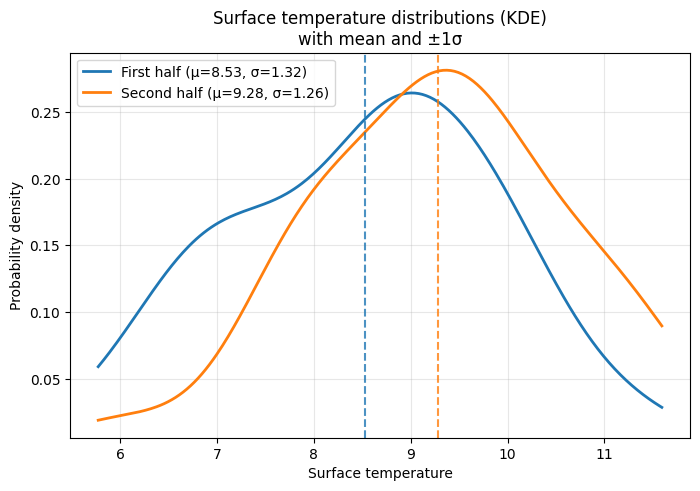

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def to_numpy(x):
    """Convert xarray, pandas, or numpy object to 1D numpy array without NaNs."""
    try:
        arr = np.asarray(x.values).ravel()
    except Exception:
        arr = np.asarray(x).ravel()
    return arr[~np.isnan(arr)]

# Convert to plain arrays
a1 = to_numpy(surface_temp_first_half)
a2 = to_numpy(surface_temp_second_half)

# Compute statistics
mean1, std1 = np.mean(a1), np.std(a1)
mean2, std2 = np.mean(a2), np.std(a2)

# Make grid for KDE
x = np.linspace(min(a1.min(), a2.min()), max(a1.max(), a2.max()), 300)

kde1 = gaussian_kde(a1)
kde2 = gaussian_kde(a2)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, kde1(x), label=f'First half (μ={mean1:.2f}, σ={std1:.2f})', lw=2)
plt.plot(x, kde2(x), label=f'Second half (μ={mean2:.2f}, σ={std2:.2f})', lw=2)

# Mean lines
plt.axvline(mean1, color='C0', linestyle='--', alpha=0.8)
plt.axvline(mean2, color='C1', linestyle='--', alpha=0.8)

plt.xlabel('Surface temperature')
plt.ylabel('Probability density')
plt.title('Surface temperature distributions (KDE)\nwith mean and ±1σ')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## BONUS EXERCISE
Repeat your analysis for December 2025. Compare your predictions to ECMWF seasonal forecasts for December which have been downloaded from the [Climate Data Store](https://cds.climate.copernicus.eu/datasets/seasonal-monthly-single-levels?tab=overview). The file tas_ECMWF_seasonal_forecast_ensemble_December_initNov2025_UK.nc contains an ensemble of seasonal forecasts released on 6th November, and contains the monthly statistic for December, so this could be considered a "sub-seasonal" forecast.

1) a) Plot the histogram of mean temperature for December using the last 30 years from GCM data.
   
   b) On the same figure, plot the histogram of December 2025 temperature using the ECMWF seasonal forecast ensemble.

2) Compare your prediction from before with the ECMWF ensemble mean and standard deviation. Which one do you trust the more and why? Note that numerical weather forecasts do not necessarily have much forecast skill one month ahead (see e.g.  [Figure 19 in this paper](https://gmd.copernicus.org/articles/12/1087/2019/gmd-12-1087-2019.pdf) )

Tip: the file contains a few grid boxes. To select the one closest to Oxford, you can use `ds_s2s.sel(longitude=-1.2577, latitude=51.7520, method='nearest')`  

<img src="https://github.com/peterukk/IE_CDT_ClimateDynamicsTutorial/blob/main/forecastskillvstime.jpg?raw=1" alt="fc" class="bg-primary mb-1" width="500px">

In [ ]:
filename = data_path + "tas_ECMWF_seasonal_forecast_ensemble_December2025_initNov_global.nc"

In [ ]:
ds_s2s = xr.open_dataset(filename)
ds_s2s

In [ ]:
ds_s2s.variables["forecast_reference_time"]

In [ ]:
s2s_data_oxford = ds_s2s.sel(longitude=-1.2577, latitude=51.7520, method='nearest')


In [ ]:
s2s_data_oxford.